<a href="https://colab.research.google.com/github/Rania-Ossama/PCA-for-Facial-Recognition/blob/Data-Preparation/Linear_Project_CelebA%E2%80%91500_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
zip_path = "/content/archive (1).zip"
extract_path = "/content/custom_celeba_500/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped!")

Dataset unzipped!


In [ ]:
# Step 2: Function to process a split
# -----------------------------
def process_split(split_dir, image_size=(100, 100)):
    images = []
    labels = []
    label_dict = {}  # Map folder name to integer label
    current_label = 0

    for person in sorted(os.listdir(split_dir)):
        person_path = os.path.join(split_dir, person)
        if not os.path.isdir(person_path):
            continue  # skip non-folders

        label_dict[person] = current_label

        for img_file in sorted(os.listdir(person_path)):
            img_path = os.path.join(person_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # grayscale
            if img is None:
                continue

            img_resized = cv2.resize(img, image_size)
            images.append(img_resized.flatten())
            labels.append(current_label)

        current_label += 1

    X = np.array(images, dtype=np.float32) / 255.0  # normalize
    y = np.array(labels, dtype=np.int32)

    print(f"Processed {split_dir}: {X.shape[0]} images, vector size: {X.shape[1]}, identities: {current_label}")
    return X, y


In [ ]:
splits = ["train", "val", "test"]
for split in splits:
    split_path = os.path.join("/content/custom_celeba_500/celeba/custom_celeba_500", split)
    X, y = process_split(split_path)

    # Save each split
    np.save(f"/content/X_{split}.npy", X)
    np.save(f"/content/y_{split}.npy", y)

Processed /content/custom_celeba_500/celeba/custom_celeba_500/train: 8544 images, vector size: 10000, identities: 500
Processed /content/custom_celeba_500/celeba/custom_celeba_500/val: 1860 images, vector size: 10000, identities: 480
Processed /content/custom_celeba_500/celeba/custom_celeba_500/test: 1561 images, vector size: 10000, identities: 463


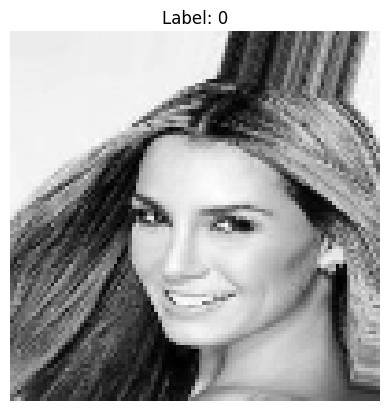

In [ ]:
X_train = np.load("/content/X_train.npy")
y_train = np.load("/content/y_train.npy")

plt.imshow(X_train[0].reshape(100, 100), cmap='gray', interpolation='nearest')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

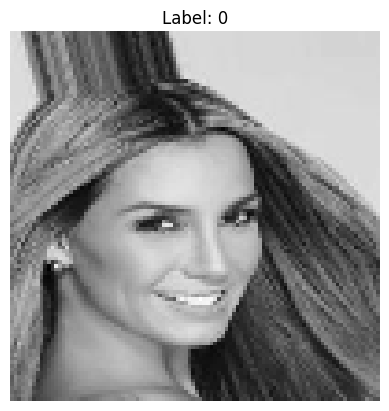

In [ ]:
X_test = np.load("/content/X_test.npy")
y_test = np.load("/content/y_test.npy")

plt.imshow(X_test[0].reshape(100, 100), cmap='gray', interpolation='nearest')
plt.title(f"Label: {y_test[0]}")
plt.axis('off')
plt.show()

In [ ]:
np.array_equal(X_train[0], X_test[0])


False

In [ ]:
print(X_train.shape)
print(X_test.shape)


(8544, 10000)
(1561, 10000)


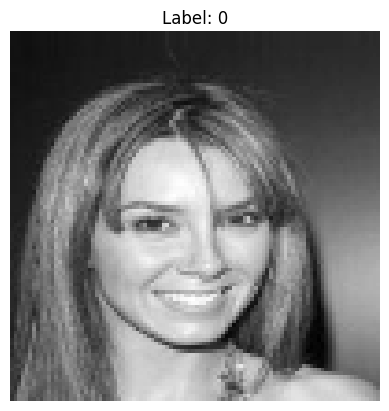

In [ ]:
X_val = np.load("/content/X_val.npy")
y_val = np.load("/content/y_val.npy")

plt.imshow(X_val[0].reshape(100, 100), cmap='gray', interpolation='nearest')
plt.title(f"Label: {y_val[0]}")
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
X_trainn = pd.DataFrame(X_train)

In [ ]:
X_trainn

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,...,0.305882,0.286275,0.290196,0.282353,0.278431,0.278431,0.270588,0.262745,0.258824,0.266667
1,0.882353,0.882353,0.878431,0.874510,0.874510,0.850980,0.650980,0.368627,0.392157,0.419608,...,0.168627,0.207843,0.254902,0.262745,0.313726,0.317647,0.294118,0.317647,0.305882,0.247059
2,0.184314,0.207843,0.231373,0.258824,0.286275,0.294118,0.290196,0.270588,0.235294,0.176471,...,0.549020,0.564706,0.552941,0.545098,0.584314,0.592157,0.580392,0.592157,0.552941,0.439216
3,0.090196,0.078431,0.074510,0.082353,0.090196,0.086275,0.082353,0.098039,0.094118,0.090196,...,0.215686,0.274510,0.262745,0.356863,0.462745,0.439216,0.541176,0.619608,0.560784,0.474510
4,0.141176,0.145098,0.145098,0.149020,0.145098,0.149020,0.156863,0.172549,0.184314,0.196078,...,0.329412,0.305882,0.278431,0.254902,0.211765,0.176471,0.129412,0.101961,0.211765,0.231373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539,0.011765,0.011765,0.011765,0.011765,0.011765,0.015686,0.015686,0.011765,0.023529,0.015686,...,0.141176,0.086275,0.015686,0.098039,0.207843,0.211765,0.207843,0.223529,0.223529,0.223529
8540,0.478431,0.470588,0.458824,0.462745,0.462745,0.462745,0.470588,0.474510,0.478431,0.482353,...,0.298039,0.301961,0.309804,0.313726,0.309804,0.254902,0.439216,0.654902,0.741176,0.647059
8541,0.803922,0.807843,0.811765,0.819608,0.819608,0.819608,0.823529,0.827451,0.827451,0.827451,...,0.066667,0.082353,0.090196,0.184314,0.227451,0.270588,0.349020,0.392157,0.458824,0.517647
8542,0.858824,0.858824,0.858824,0.858824,0.858824,0.858824,0.858824,0.858824,0.858824,0.858824,...,0.098039,0.180392,0.207843,0.325490,0.552941,0.498039,0.466667,0.705882,0.745098,0.650980


In [ ]:
X_trainn.to_csv("X_TRAIN.csv", index=False)

In [ ]:
y_trainn = pd.DataFrame(y_train)

In [ ]:
y_trainn
y_trainn.to_csv("Y_TRAIN", index = False)

In [ ]:
X_testt = pd.DataFrame(X_test)
X_testt.to_csv("X_TEST", index = False)

In [ ]:
y_testt = pd.DataFrame(y_test)
y_testt.to_csv("Y_TEST", index = False)

In [ ]:
X_vall = pd.DataFrame(X_val)
X_vall.to_csv("X_VALL", index = False)

In [ ]:
y_vall = pd.DataFrame(y_val)
y_vall.to_csv("Y_VALL", index = False)